In [5]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [6]:
#image_path = '/home/alicia/store1/alicia/jellyfish/h5_data/no_channel_dim/cropped/no_noise'
image_path = '/home/alicia/store1/alicia/jellyfish/h5_data/no_channel_dim/cropped/no_noise/hardest_problem/bg_threshold'
#image_path = '/store1/PublishedData/Data/prj_register/BrainAlignNet/train/nonaugmented/2022-07-15-12'

with h5py.File(f'{image_path}/fixed_images.h5', 'r') as f:
    problems = list(f.keys())
    
print(f'number of problems: {len(problems)}')
print(f'sample problems: {problems[:]}')

number of problems: 1
sample problems: ['1to15011']


In [7]:
### layering fixed and moving images on top of each other
def overlay_matrices(matrix1, matrix2, dim, contrast_factor=1,
                    title="Image Overlay",
                    x_min=None, x_max=None, y_min=None, y_max=None):
    """
    Create a plot that overlays the MIPs of two matrices along a specified dimension.
    
    Parameters:
    - matrix1, matrix2 (np.array): 3D numpy arrays.
    - dim (int): The dimension along which to compute and overlay the MIPs.
    - contrast_factor (float): Factor by which to divide the maximum intensity 
                               to increase the image contrast. Must be >= 1.
    """
    # Ensure the matrices are 3D
    """
    if matrix1.ndim != 3 or matrix2.ndim != 3:
        raise ValueError("Input matrices must be 3D")
    """
    
    # Compute MIPs
    mip1 = np.max(matrix1, dim)
    mip2 = np.max(matrix2, dim)
    
    # Ensure MIPs are 2D
    if mip1.ndim != 2 or mip2.ndim != 2:
        raise ValueError("MIPs must be 2D")
    
    # Normalize MIPs to [0, 1] based on the adjusted maximum values
    mip1_norm = mip1 / (np.max(mip1) / contrast_factor)
    mip2_norm = mip2 / (np.max(mip2) / contrast_factor)
    
    # Ensure values are clipped to [0, 1] after adjusting contrast
    mip1_norm = np.clip(mip1_norm, 0, 1)
    mip2_norm = np.clip(mip2_norm, 0, 1)
    
    # Create an RGB image: R corresponds to mip1, G to mip2, B is kept 0
    #rgb_image = np.stack([mip1_norm, mip2_norm, np.zeros_like(mip1_norm)], axis=-1)
    rgb_image = np.stack([5 * mip1_norm / 6, mip1_norm / 2 + mip2_norm / 2, mip2_norm], axis=-1)
    
    #rgb_image = np.fliplr(rgb_image)
    
    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(12, 12))
    
    # Plot the RGB image
    ax.imshow(rgb_image)
    
    # Draw the bounded box if coordinates are provided
    if x_min is not None and x_max is not None and y_min is not None and y_max is not None:
        
        # Calculate width and height of the rectangle from the zoom range
        rect_width = x_max - x_min
        rect_height = y_max - y_min

        # Create a white rectangle patch
        # Note: The x_max and x_min values need to be mirrored as well
        mirrored_x_min = mirrored_roi.shape[1] - x_max
        mirrored_x_max = mirrored_roi.shape[1] - x_min
        rect = patches.Rectangle((mirrored_x_min, y_min), rect_width, rect_height, linewidth=1, edgecolor='w', facecolor='none')
        ax.add_patch(rect)
    
    # Add a title and show the plot
    ax.set_title(title)
    plt.show()

In [8]:
problem = np.random.choice(problems)
#problem = '1to15011'
print(f'registration problem: {problem}')

with h5py.File(f'{image_path}/moving_images.h5', 'r') as f:
    moving_image = f[problem][:]

with h5py.File(f'{image_path}/fixed_images.h5', 'r') as f:
    fixed_image = f[problem][:]

with h5py.File(f'{image_path}/fixed_labels.h5', 'r') as f:
    fixed_label = f[problem][:]

with h5py.File(f'{image_path}/moving_labels.h5', 'r') as f:
    moving_label = f[problem][:]

registration problem: 1to15011


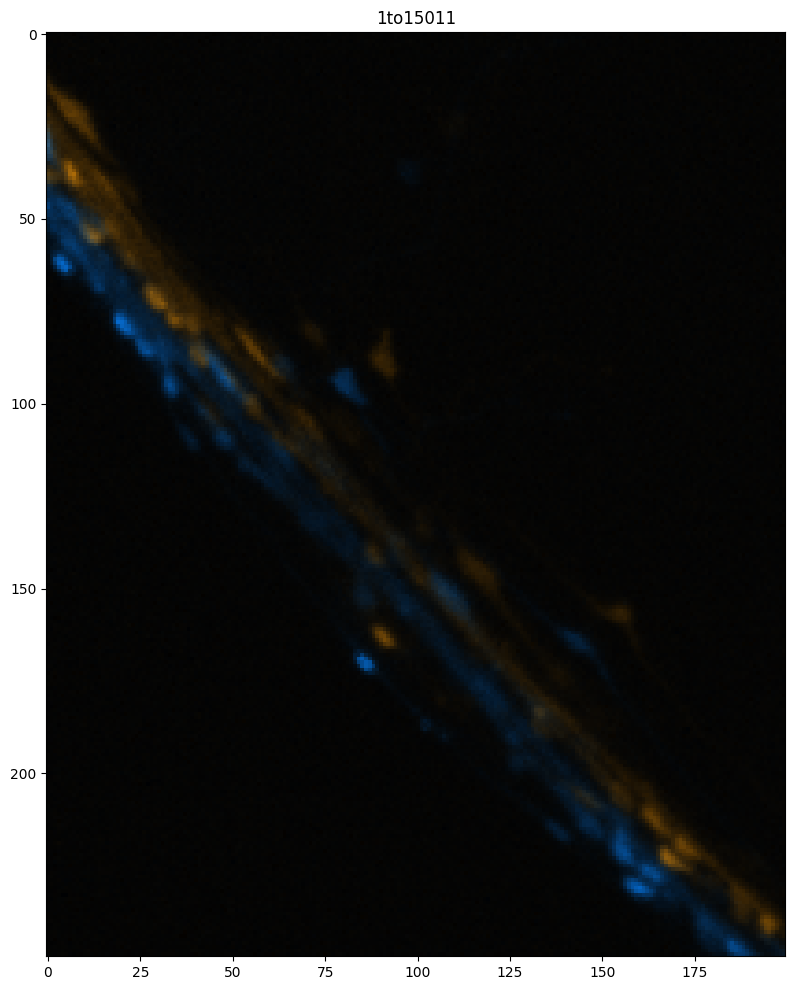

In [9]:
#overlay_matrices(fixed_image[:], moving_image[:], 2, title=problem, contrast_factor=1)
overlay_matrices(fixed_image, moving_image, 2, title=problem, contrast_factor=0.8)

In [15]:
moving_image[moving_image==0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

(250, 200, 1)


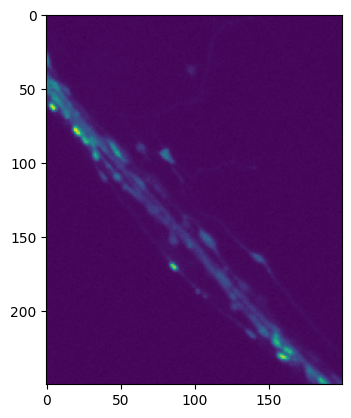

In [10]:
plt.imshow(moving_image.max(2));
print(moving_image.shape)

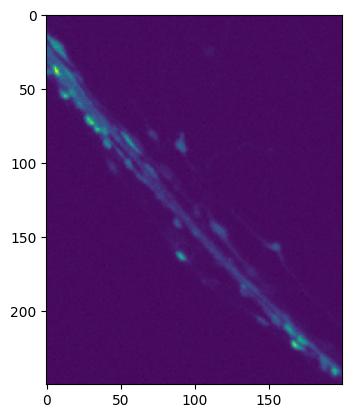

In [11]:
plt.imshow(fixed_image.max(2));

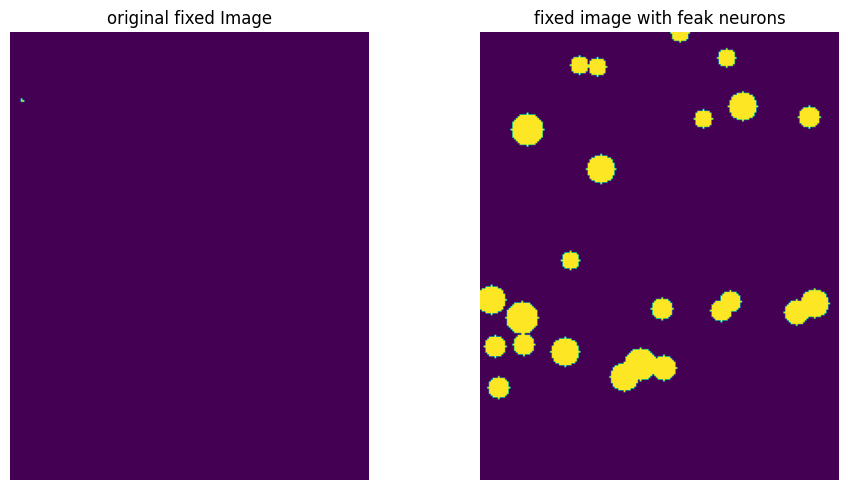

200.0


In [12]:
import cv2

num_circles = 40
circle_image = fixed_image.copy()
for _ in range(num_circles):
    # Random position within bounds
    center = (np.random.randint(0, 400), np.random.randint(0, 200))
    # Random radius within reasonable bounds
    radius = np.random.randint(5, 10)
    # Draw the circle on the image
    cv2.circle(circle_image, center, radius, (200,), -1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("original fixed Image")
plt.imshow(fixed_image[:, :, 0])
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("fixed image with feak neurons")
plt.imshow(circle_image[:, :, 0])
plt.axis("off")

plt.tight_layout()
plt.show()

print(np.max(circle_image))

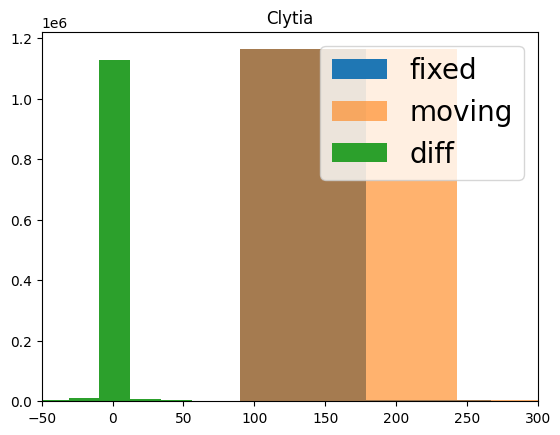

In [128]:
plt.hist(fixed_image.flatten(), bins=5, label='fixed');
plt.hist(moving_image.flatten(), bins=5, alpha=0.6, label='moving');
plt.hist(fixed_image.flatten() - moving_image.flatten(), bins=50, label='diff')
plt.xlim(-50, 300)
plt.legend(fontsize=20);
plt.title('Clytia');

In [16]:
from train import set_GPU, fit_deepreg
from deepreg.callback import build_checkpoint_callback
from deepreg.registry import REGISTRY
from deepreg.util import build_dataset
import deepreg.model.optimizer as opt
import deepreg.train as train
import tensorflow as tf

In [17]:
base = '/home/alicia/notebook/alicia/jellyfish'
config_path = f'{base}/config.yaml'
log_dir = base
experiment_name = 'proof'
max_epochs = 3
initial_epoch = 1

In [18]:
set_GPU(3)
fit_deepreg(
        config_path,
        log_dir,
        experiment_name,
        max_epochs,
        initial_epoch)

2025-01-19 18:26:40 | WARNING  | Log directory /home/alicia/notebook/alicia/jellyfish/proof exists already.


2025-01-19 18:26:40.998462: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 45131 MB memory:  -> device: 3, name: NVIDIA RTX 6000 Ada Generation, pci bus id: 0000:c2:00.0, compute capability: 8.9


Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.
2025-01-19 18:26:44 | WARNING  | The weight for loss regularization is zero.Loss is not used.


2025-01-19 18:26:49.033533: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2025-01-19 18:26:51.338975: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f5d1994fc70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-01-19 18:26:51.339012: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX 6000 Ada Generation, Compute Capability 8.9
2025-01-19 18:26:51.343430: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1737311211.458066 1099914 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 1/3
1/1 [==============================] - 4s 4s/step - loss: 0.0000e+00 - metric/moving_image_mean: 0.0000e+00 - metric/moving_image_min: 0.0000e+00 - metric/moving_image_max: 0.0000e+00 - metric/fixed_image_mean: 0.0000e+00 - metric/fixed_image_min: 0.0000e+00 - metric/fixed_image_max: 0.0000e+00 - loss/image_LocalNormalizedCrossCorrelationLoss: 0.0000e+00 - loss/image_LocalNormalizedCrossCorrelationLoss_weighted: 0.0000e+00 - metric/ddf_mean: 0.1282 - metric/ddf_min: 0.0367 - metric/ddf_max: 0.1913 - val_loss: 0.0000e+00 - val_metric/moving_image_mean: 0.0359 - val_metric/moving_image_min: 0.0000e+00 - val_metric/moving_image_max: 1.0000 - val_metric/fixed_image_mean: 0.0438 - val_metric/fixed_image_min: 0.0000e+00 - val_metric/fixed_image_max: 1.0000 - val_loss/image_LocalNormalizedCrossCorrelationLoss: 0.0000e+00 - val_loss/image_LocalNormalizedCrossCorrelationLoss_weighted: 0.0000e+00 - val_metric/ddf_mean: 0.1282 - val_metric/ddf_min: 0.0367 - val_metric/ddf_max: 0.1913
Ep

In [19]:
### register with trained checkpoints
from register import register

In [59]:
base = '/home/alicia/notebook/alicia/jellyfish'
model_config_path = f"{base}/test_config.yaml"
model_ckpt_path = f"{base}/test_proof/save/ckpt-2"

In [ ]:
registered_outputs = register(model_config_path, model_ckpt_path)

  0%|                                                                                                                                  | 0/96 [00:00<?, ?it/s]

2025-01-19 18:15:59 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:15:59 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


  1%|█▎                                                                                                                        | 1/96 [00:06<10:24,  6.57s/it]

2025-01-19 18:16:06 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:06 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


  2%|██▌                                                                                                                       | 2/96 [00:07<05:25,  3.46s/it]

2025-01-19 18:16:07 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:07 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


  3%|███▊                                                                                                                      | 3/96 [00:09<04:04,  2.63s/it]

2025-01-19 18:16:09 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:09 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


  4%|█████                                                                                                                     | 4/96 [00:10<03:14,  2.12s/it]

2025-01-19 18:16:10 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:10 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


  5%|██████▎                                                                                                                   | 5/96 [00:12<02:46,  1.83s/it]

2025-01-19 18:16:11 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:11 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


  6%|███████▋                                                                                                                  | 6/96 [00:13<02:29,  1.66s/it]

2025-01-19 18:16:13 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:13 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


  7%|████████▉                                                                                                                 | 7/96 [00:15<02:27,  1.65s/it]

2025-01-19 18:16:14 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:14 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


  8%|██████████▏                                                                                                               | 8/96 [00:16<02:16,  1.56s/it]

2025-01-19 18:16:15 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:15 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


  9%|███████████▍                                                                                                              | 9/96 [00:17<02:09,  1.48s/it]

2025-01-19 18:16:17 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:17 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 10%|████████████▌                                                                                                            | 10/96 [00:19<02:04,  1.44s/it]

2025-01-19 18:16:18 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:18 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 11%|█████████████▊                                                                                                           | 11/96 [00:20<01:59,  1.40s/it]

2025-01-19 18:16:19 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:19 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 12%|███████████████▏                                                                                                         | 12/96 [00:22<02:04,  1.49s/it]

2025-01-19 18:16:21 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:21 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 14%|████████████████▍                                                                                                        | 13/96 [00:23<01:59,  1.44s/it]

2025-01-19 18:16:22 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:22 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 15%|█████████████████▋                                                                                                       | 14/96 [00:24<01:55,  1.41s/it]

2025-01-19 18:16:24 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:24 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 16%|██████████████████▉                                                                                                      | 15/96 [00:26<01:52,  1.39s/it]

2025-01-19 18:16:25 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:25 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 17%|████████████████████▏                                                                                                    | 16/96 [00:27<01:57,  1.47s/it]

2025-01-19 18:16:27 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:27 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 18%|█████████████████████▍                                                                                                   | 17/96 [00:29<01:53,  1.44s/it]

2025-01-19 18:16:28 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:28 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 19%|██████████████████████▋                                                                                                  | 18/96 [00:30<01:50,  1.41s/it]

2025-01-19 18:16:30 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:30 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 20%|███████████████████████▉                                                                                                 | 19/96 [00:31<01:47,  1.39s/it]

2025-01-19 18:16:31 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:31 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 21%|█████████████████████████▏                                                                                               | 20/96 [00:33<01:44,  1.38s/it]

2025-01-19 18:16:32 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:32 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 22%|██████████████████████████▍                                                                                              | 21/96 [00:34<01:50,  1.48s/it]

2025-01-19 18:16:34 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:34 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 23%|███████████████████████████▋                                                                                             | 22/96 [00:36<01:46,  1.44s/it]

2025-01-19 18:16:35 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:35 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 24%|████████████████████████████▉                                                                                            | 23/96 [00:37<01:43,  1.42s/it]

2025-01-19 18:16:37 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:37 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 25%|██████████████████████████████▎                                                                                          | 24/96 [00:39<01:40,  1.40s/it]

2025-01-19 18:16:38 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:38 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 26%|███████████████████████████████▌                                                                                         | 25/96 [00:40<01:45,  1.49s/it]

2025-01-19 18:16:40 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:40 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 27%|████████████████████████████████▊                                                                                        | 26/96 [00:42<01:44,  1.50s/it]

2025-01-19 18:16:41 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:41 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 28%|██████████████████████████████████                                                                                       | 27/96 [00:43<01:41,  1.46s/it]

2025-01-19 18:16:43 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:43 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 29%|███████████████████████████████████▎                                                                                     | 28/96 [00:44<01:37,  1.43s/it]

2025-01-19 18:16:44 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:44 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 30%|████████████████████████████████████▌                                                                                    | 29/96 [00:46<01:35,  1.42s/it]

2025-01-19 18:16:45 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:45 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 31%|█████████████████████████████████████▊                                                                                   | 30/96 [00:48<01:41,  1.54s/it]

2025-01-19 18:16:47 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:47 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 32%|███████████████████████████████████████                                                                                  | 31/96 [00:49<01:37,  1.50s/it]

2025-01-19 18:16:49 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:49 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 33%|████████████████████████████████████████▎                                                                                | 32/96 [00:50<01:33,  1.47s/it]

2025-01-19 18:16:50 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:50 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 34%|█████████████████████████████████████████▌                                                                               | 33/96 [00:52<01:31,  1.45s/it]

2025-01-19 18:16:51 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:51 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 35%|██████████████████████████████████████████▊                                                                              | 34/96 [00:53<01:28,  1.43s/it]

2025-01-19 18:16:53 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:53 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 36%|████████████████████████████████████████████                                                                             | 35/96 [00:55<01:33,  1.53s/it]

2025-01-19 18:16:55 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:55 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


 38%|█████████████████████████████████████████████▍                                                                           | 36/96 [00:56<01:29,  1.49s/it]

2025-01-19 18:16:56 | WARNING  | Log directory outputs/outputs exists already.
2025-01-19 18:16:56 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


In [ ]:
registered_outputs['bg_threshold'].keys()

In [134]:
"""problem = '1to15011'
warped_moving_image = registered_outputs['hardest_problem'][problem]['warped_moving_image']
ddf = registered_outputs['hardest_problem'][problem]['ddf']
"""

problem = '1010to1213'
warped_moving_image = registered_outputs['2022-07-15-12'][problem]['warped_moving_image']
ddf = registered_outputs['2022-07-15-12'][problem]['ddf']
print(np.unique(ddf))

[-7.257375  -7.247821  -7.2448235 ... 11.597346  11.598905  11.606756 ]


In [135]:
np.unique(ddf)

array([-7.257375 , -7.247821 , -7.2448235, ..., 11.597346 , 11.598905 ,
       11.606756 ], dtype=float32)

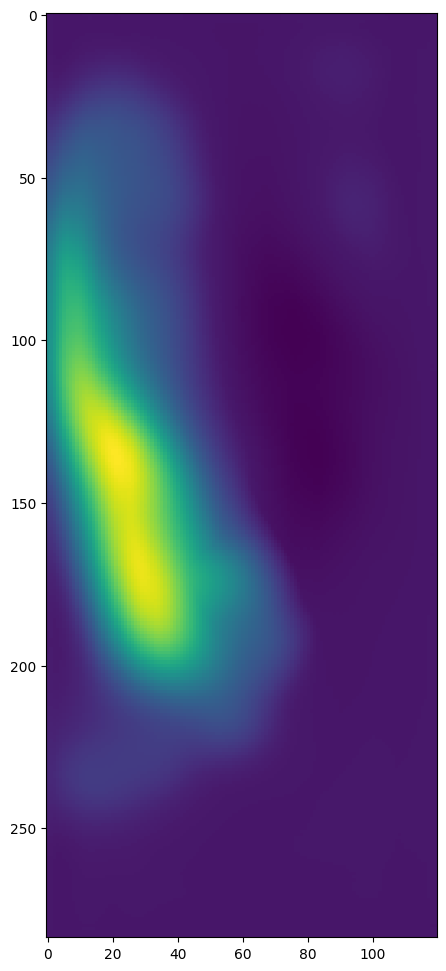

In [138]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(ddf[:, :, :, 1].max(2));

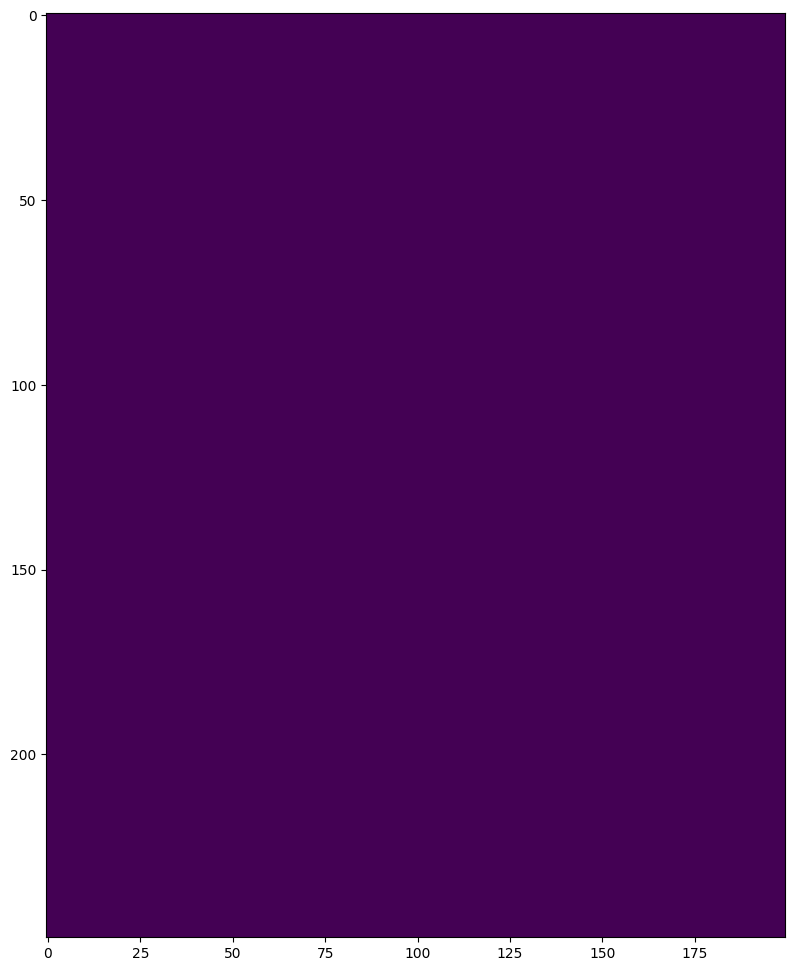

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(warped_moving_image);